In [225]:
import pandas as pd # obvious imports.
import numpy as np
import matplotlib.pyplot as plt
import csv
import random as random
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D

oec = pd.read_csv("oec.csv") # load .csv file

massSemiMajor = oec[["pl_orbsmax", "pl_bmassj", "pl_discmethod"]]

#Logs all values of orbital radius and mass for each exo-planet
for j in range(len(massSemiMajor)): 
        massSemiMajor.at[j , 'pl_orbsmax'] = math.log(massSemiMajor.loc[j, 'pl_orbsmax'], 10)
        massSemiMajor.at[j , 'pl_bmassj'] = math.log(massSemiMajor.loc[j, 'pl_bmassj'], 10)

#Removes all exo-planets which have missing data
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_orbsmax'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_bmassj'])]
massSemiMajor = massSemiMajor[pd.notnull(massSemiMajor['pl_discmethod'])]

In [226]:
#Calculates a given euclidean distance for a two given points (2D)
def euclidean(xp, yp, xc, yc):
    return ((xp-xc)**2 +(yp-yc)**2)**(1/2)

In [235]:
#Randomly generates k number of centroids
k = 4
centroids = []
for i in range(k):
    centroids.append([random.uniform(-1.5, 1.5), random.uniform(-3, 1)])

#How many times to run the program, accuracy increases over time
epochs = 10
for i in range(epochs):
    #Holds all the x and y coordinates for each member of a centroid
    centroidMembers = []
    for i in range(k):
        centroidMembers.append([])
    
    #Iterates over all the exo-planets with a mass and orbital radius, adding to the centroid which has the shortest
    #euclidean distance
    for index, row in massSemiMajor.iterrows():
        euclideanDistances = []
        for i in range(k):
            euclideanDistances.append(euclidean(row['pl_orbsmax'], row['pl_bmassj'], centroids[i][0], centroids[i][1]))
        
        x = euclideanDistances.index(min(euclideanDistances))
        centroidMembers[x].append([row['pl_orbsmax'], row['pl_bmassj']])
        massSemiMajor.at[index , 'pl_discmethod'] = x
            
    #Adds all X and Y values to seperate arrays to make it easier to calculate the new centroid values
    centroidMembersX = []
    centroidMembersY = []
    
    for z in range(k):
        xList = []
        yList = []
        for m in range(len(centroidMembers[z])):
            xList.append(centroidMembers[z][m][0])
            yList.append(centroidMembers[z][m][1])
            
        centroidMembersX.append(xList)
        centroidMembersY.append(yList)
    
    #Calculate new centroids, which are the midpoint of all current values in a given centroid 
    centroidMembersX.sort()
    centroidMembersY.sort()
    for h in range(k):
        centroids[h][0] = (centroidMembersX[h][len(centroidMembersX[h]) - 1] + centroidMembersX[h][0]) / 2
        centroids[h][1] = (centroidMembersY[h][len(centroidMembersY[h]) - 1] + centroidMembersY[h][0]) / 2

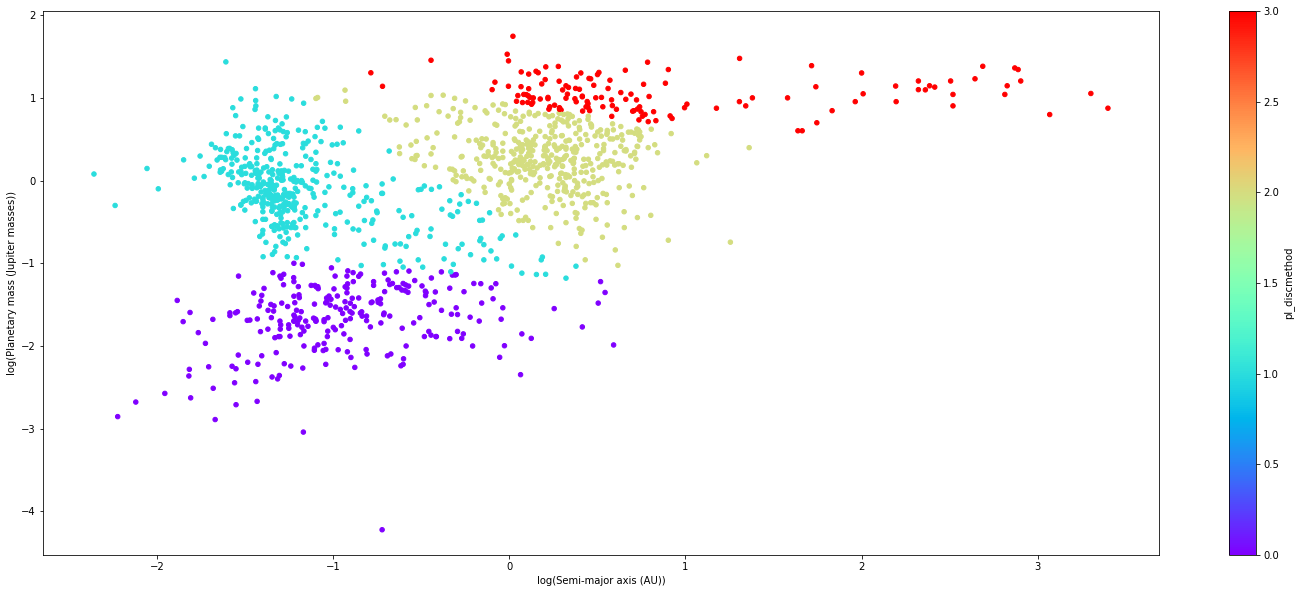

In [236]:
fig, ax = plt.subplots()

massSemiMajor.plot(kind='scatter',x='pl_orbsmax', y='pl_bmassj', c='pl_discmethod', ax=ax, colormap='rainbow',figsize=(25, 10)) #Plots scatter graph

ax.set_xlabel("log(Semi-major axis (AU))")
ax.set_ylabel("log(Planetary mass (Jupiter masses))")

plt.show()
# for new graph plot radius against orbital period. - radius column is called = pl_radiusj

# WE NEED TO WRITE MARKDOWN TO CLEARLY CONVEY OUR CONCLUSIONS.

The above graph shows exo-planet clustering, with log of the planetary mass against log of the orbital radius. The K-Means clustering algorithm has been used to colour code the clusters for ease of use.